# Topic 1 homework

Load datasets & packages

In [258]:
import os 
cwd = os.getcwd()

from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd 
import scipy.stats as stats


state = pd.read_csv(cwd+'/state.csv')
loans_income = pd.read_csv(cwd+'/loans_income.csv')

## Exercise 1
Use the data `state.csv` to do the following exercise:

Read the data in pandas, and perform exploratory data analysis for all variables in the data:

1. Show all data types, missing rates
2. Numerical variables provide mean, standard deviation, five number summary, histogram
3. Categorical variables provide a frequency table and bar chart
4. Perform at least 2 pairs of variables for 2 types of bivariate charts
5. Provide a short summary to describe what you know about your data in this exercise.

In [2]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
state.info()
# state['State'].unique() 50 unique states, no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [4]:
state.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.300,6.848235e+06,563626.0,1833004.250,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.066,1.915736e+00,0.9,2.425,4.0,5.55,10.3


In [5]:
print(f"{len(state[state['Population'] >= state.describe().loc['mean']['Population']]['State'])} states population greater than mean")
print(f"{len(state[state['Murder.Rate'] > state.describe().loc['mean']['Murder.Rate']]['State'])} states murder rate greater than mean")

# top 5 largest state
# state[state['Population'] >= state.describe().loc['mean']['Population']].sort_values(['Population'],ascending=False).head(5)['Abbreviation']

# top 5 state with higest murder rate
# state[state['Population'] >= state.describe().loc['mean']['Murder.Rate']].sort_values(['Murder.Rate'],ascending=False).head(5)['Abbreviation']

17 states population greater than mean
24 states murder rate greater than mean


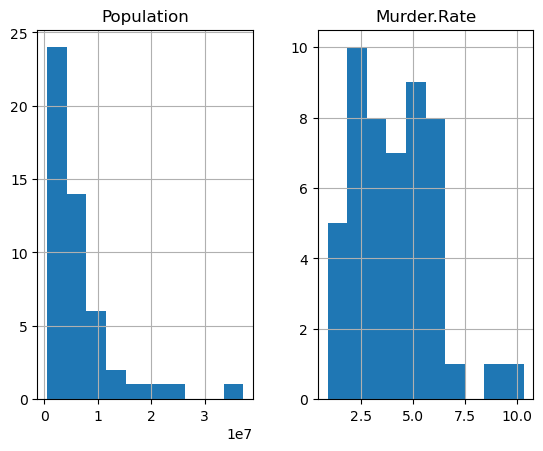

In [6]:
state[['Population','Murder.Rate']].hist()
plt.show()

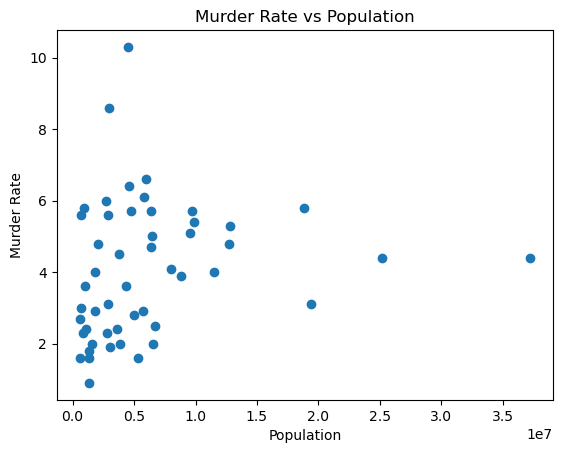

In [7]:
# state.value_counts()
plt.scatter(state['Population'],state['Murder.Rate'])
plt.xlabel('Population')
plt.ylabel('Murder Rate')
plt.title('Murder Rate vs Population')
plt.show()

In [8]:
state.corr()

/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_26562/4213457644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  state.corr()


,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


In [9]:
state_profile = ProfileReport(state, title="State Profiling Report")
state_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Summary
The `state` dataset detailed total population and murder rate for each state. The population of states distribution is right skewed and the murder rate is close to be normally distributed. There are 17 states population greater than mean (CA with the largest population) and 24 states with a murder rate greater than mean (LA with the highest murder rate). The correlation between population and murder rate is low (0.182069). It would be interesting to investigate murder rate and population with demographic data and time series data.

## Exercise 2
Use the data `loans_income.csv` to do the following exercise:

Read the data in pandas and:

1. Draw a sample with 1000 observations. Plot the sample's data distribution
2. Implement bootstrap to take 10, 50, 100, and 1000 times resampling to repeatedly draw an income sample with 10 incomes. Plot the sample mean distribution for each resampling 
3. Implement bootstrap to take 10, 50, 100, and 1000 times resampling to repeatedly draw an income sample with 100 incomes. Plot the sample mean distribution for each resampling 
4. Overlap distribution plots of samples in 2 and 3 when the resampling size is the same.


In [21]:
# loans_income is list of numbers
loans_income.isna().sum()

x    0
dtype: int64

In [134]:
loans_income.shape

(50000, 1)

### 1. Draw a sample with 1000 observations. Plot the sample's data distribution

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

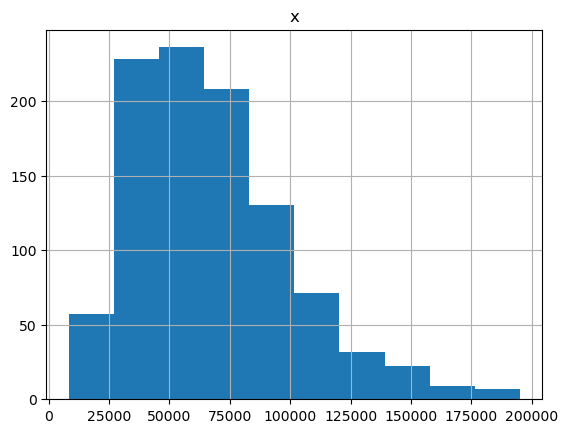

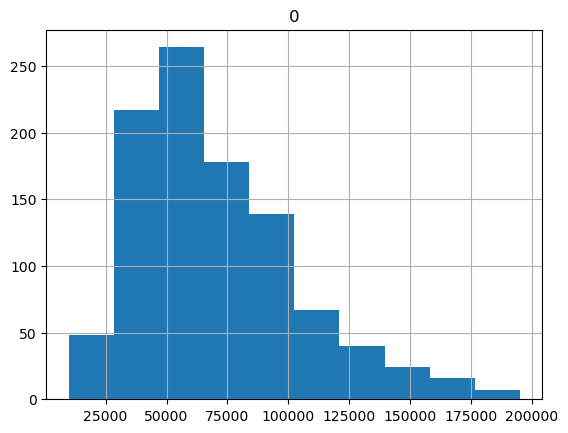

In [273]:
np.random.seed(123)
loans_income.sample(1000).hist() #default replacement false

# different method
pd.DataFrame(np.random.choice(loans_income['x'],1000)).hist()

### 2, 3, 4

In [195]:
# 2. 
np.random.seed(123)

boot10_10_mean = []
for i in range(10) :
    boot10_10=loans_income.sample(10,replace=True)
    mean10_10 = boot10_10.mean()['x']
    boot10_10_mean.append(mean10_10)

boot10_50_mean=[]
for i in range(50) :
    boot10_50=loans_income.sample(10,replace=True)
    mean10_50 = np.mean(boot10_50)['x']
    boot10_50_mean.append(mean10_50)

boot10_100_mean=[]
for i in range(100) :
    boot10_100=loans_income.sample(10,replace=True)
    mean10_100 = np.mean(boot10_100)['x']
    boot10_100_mean.append(mean10_100)

boot10_1000_mean=[]
for i in range(1000) :
    boot10_1000=loans_income.sample(10,replace=True)
    mean10_1000 = np.mean(boot10_1000)['x']
    boot10_1000_mean.append(mean10_1000)
    
    
# 3.
boot100_10_mean = []
for i in range(10) :
    boot100_10=loans_income.sample(100,replace=True)
    mean100_10 = boot100_10.mean()['x']
    boot100_10_mean.append(mean100_10)

boot100_50_mean=[]
for i in range(50) :
    boot100_50=loans_income.sample(100,replace=True)
    mean100_50 = np.mean(boot100_50)['x']
    boot100_50_mean.append(mean100_50)

boot100_100_mean=[]
for i in range(100) :
    boot100_100=loans_income.sample(100,replace=True)
    mean100_100 = np.mean(boot100_100)['x']
    boot100_100_mean.append(mean100_100)

boot100_1000_mean=[]
for i in range(1000) :
    boot100_1000=loans_income.sample(100,replace=True)
    mean100_1000 = np.mean(boot100_1000)['x']
    boot100_1000_mean.append(mean100_1000)

#### 10 resamples

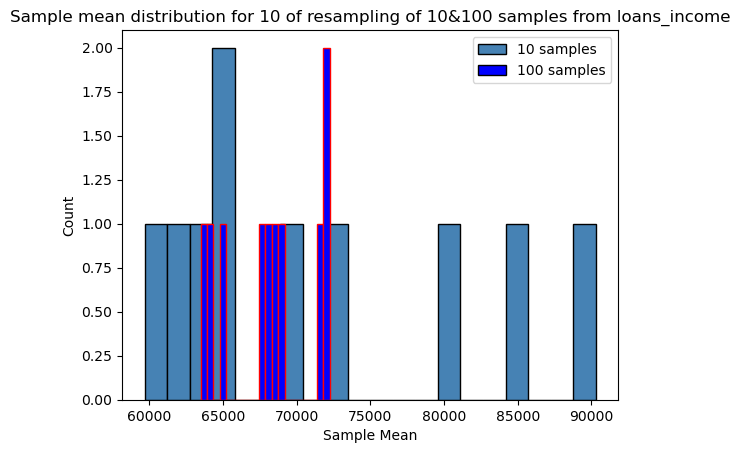

In [225]:
plt.hist(pd.to_numeric(boot10_10_mean), bins=20, color='steelblue', edgecolor='black')
plt.hist(pd.to_numeric(boot100_10_mean), bins=20, color='blue', edgecolor='red')

# legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['steelblue','blue']]
labels= ['10 samples','100 samples']
plt.legend(handles, labels)

plt.title('Sample mean distribution for 10 of resampling of 10&100 samples from loans_income')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

#### 50 resamples

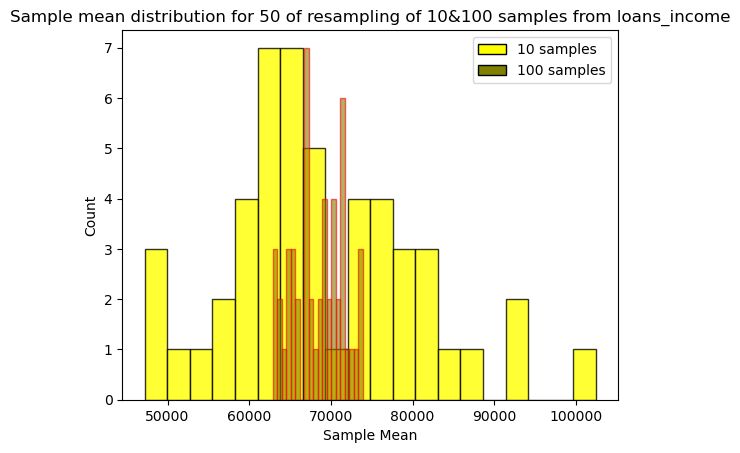

In [256]:
plt.hist(pd.to_numeric(boot10_50_mean), bins=20, color='yellow', edgecolor='black',alpha=0.8)
plt.hist(pd.to_numeric(boot100_50_mean), bins=20, color='olive', edgecolor='red',alpha=0.6)

# legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['yellow','olive']]
labels= ['10 samples','100 samples']
plt.legend(handles, labels)

plt.title('Sample mean distribution for 50 of resampling of 10&100 samples from loans_income')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

#### 100 resamples

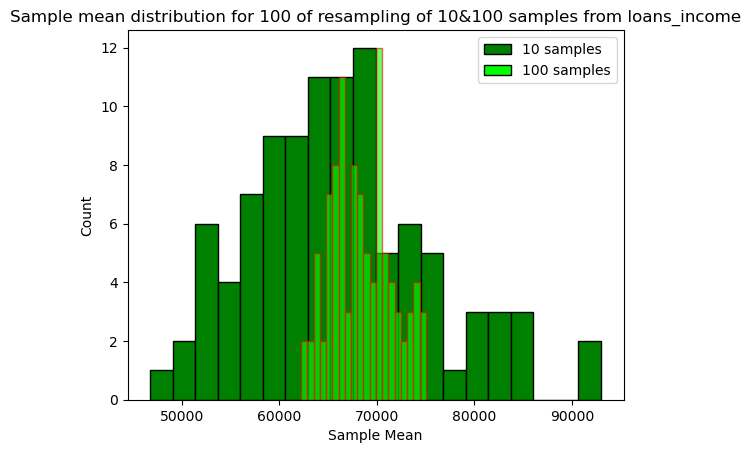

In [246]:
plt.hist(pd.to_numeric(boot10_100_mean), bins=20, color='green', edgecolor='black')
plt.hist(pd.to_numeric(boot100_100_mean), bins=20, color='lime', edgecolor='red', alpha=0.6)

# legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['green','lime']]
labels= ['10 samples','100 samples']
plt.legend(handles, labels)

plt.title('Sample mean distribution for 100 of resampling of 10&100 samples from loans_income')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

#### 1000 samples

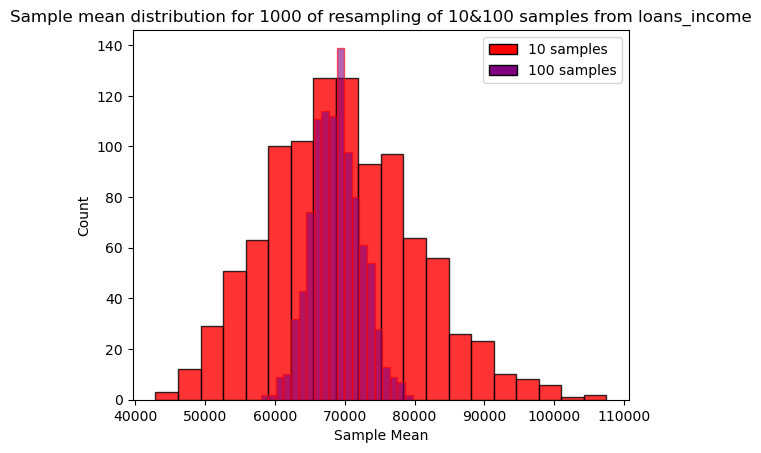

In [257]:
plt.hist(pd.to_numeric(boot10_1000_mean), bins=20, color='red', edgecolor='black',alpha=0.8)
plt.hist(pd.to_numeric(boot100_1000_mean), bins=20, color='purple', edgecolor='red',alpha=0.6)

# legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['red','purple']]
labels= ['10 samples','100 samples']
plt.legend(handles, labels)

plt.title('Sample mean distribution for 1000 of resampling of 10&100 samples from loans_income')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

## Exercise 3
A rental car company claims the average time to rent a car on its website is 60 seconds with a standard deviation of 30 seconds. A random sample of 36 customers attempted to rent a car on the website. 

1. If the average time to rent was 65 seconds. Is this enough evidence to contradict the company's claim at a 95% confidence level? What's the power?

2. If the analytics team believe the previous claim is incorrect and the average time to rent is 67 seconds, what is the sample size needed to design a sufficient test with 85% of power to test this new claim?

http://powerandsamplesize.com/Calculators/

### 1. 
2 sample, 2 sided test

H0: There's no significant difference betwern claim mean and rent mean. claim_mean = mean

Ha: claim_mean != mean

power = 0.1095

With 5% significant level (95% confidence level) Z within -1.96 and +1.96

In [288]:
claim_mean=60
claim_std=30
n=36
mean=65
Z = (mean-claim_mean)/(claim_std/n**0.5) # <1.96 Z(0.95)
print(f'Z = {Z}')

# p-value compare with 0.05
# power: less used pg 52

# Not enough evidence to contradict company claim 60 seconds

Z = 1.0


### 2. 
https://wise1.cgu.edu/power/power_sample.asp

https://www.pindling.org/Math/Learning/Statistics/z_scores_table.htm
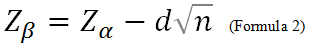
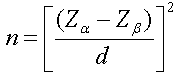

In [311]:
claim_mean=60
claim_std=30
mean=67
Za = 1.645 # alpha = 0.05 95 percentile Z
Zb = 1.036 # 85 percentile Z
d = (mean-claim_mean) / claim_std 
n=((Za+Zb)/d)**2
print(f'sample size = {n}')

sample size = 132.0201
